# DATA ANALYSIS

The purpose of this project is to build a simple regression model capable of predicting the price iof a vehicle based on its features available.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### First the data is read into the notebook and then cleaned

In [4]:
path = r'''C:\Users\Gbolahan\Downloads\Tutorials\auto.csv'''

# The headers are added to the created and theen added to the dataframe

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body_style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb_weight","engine_type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression_ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [5]:
df = pd.read_csv(path, names = headers)

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body_style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression_ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [33]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body_style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km'],
      dtype='object')

### Dealing with null values

In [7]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body_style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression_ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
# checking all the rows with null values
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body_style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression_ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

Average of normalized-losses: 122.0


In [50]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body_style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg          float64
price                float64
city-L/100km         float64
dtype: object


In [10]:
# now to change all the columns to an appropriate datatype and deal with nulls present in the dataset by replacing them with the average
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)
df["bore"].replace(np.nan, avg_bore, inplace=True)


avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)


avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)




Average of bore: 3.3297512437810943
Average horsepower: 104.25615763546799
Average peak rpm: 5125.369458128079


In [38]:
# here we ant to replace all Nan with the maximum alue in the given column

#To see which values are present in a particular column, we can use the ".value_counts()" method:
df['num-of-doors'].value_counts()



four    115
two      86
Name: num-of-doors, dtype: int64

In [39]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)


In [40]:
# drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index
df.reset_index(drop=True, inplace=True)

In [52]:
# Converting columns to appropriate datatypes 

df[["bore", "stroke","price","peak-rpm"]] = df[["bore", "stroke","price", "peak-rpm"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
# df[["price"]] = df[["price"]].astype("float")
# df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

 To standardize the data by converting the to a common format

In [14]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body_style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression_ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


In [47]:
df.to_csv('auto.csv')

## NOW TO ANALYSE THE DATA

In [14]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg          float64
price                 object
city-L/100km         float64
dtype: object


In [15]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,city-L/100km
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,8.044957,9.944145
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,1.840739,2.534599
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,4.351852,4.795918
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,6.911765,7.833333
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,7.833333,9.791667
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,9.400000,12.368421
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,14.687500,18.076923


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [19]:
# Getting the correlation of the variables in the dataset
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.279740,-0.035527,-0.029807,-0.082391,0.066171
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.239543,-0.225016,0.181189,0.133999,0.238567
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,-0.360305,-0.470606,0.577576,0.584642,0.476153
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,-0.285970,-0.665192,0.707108,0.690628,0.657373
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,-0.245800,-0.633531,0.736728,0.751265,0.673363
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.309974,-0.049800,0.084301,0.135486,0.003811
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,-0.279361,-0.749543,0.836921,0.834415,0.785353
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,-0.256733,-0.650546,0.783465,0.872335,0.745059
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,-0.267392,-0.582027,0.559112,0.543155,0.554610
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,-0.065713,-0.034696,0.047885,0.082310,0.037300


Analyzing Individual Feature Patterns Using Visualization

### Viewing the relationship between categorical variables using boxplots

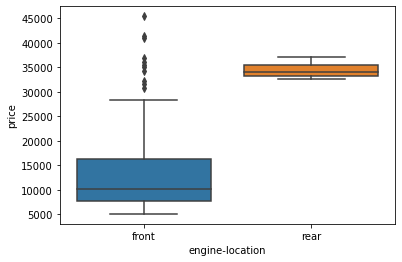

In [16]:
sns.boxplot(x="engine-location", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

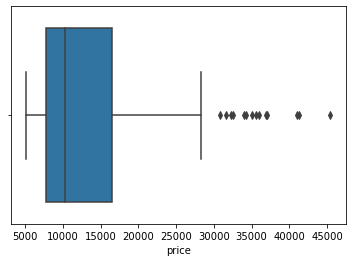

In [35]:
sns.boxplot(x = df['price'])

Here we see the distribution of price

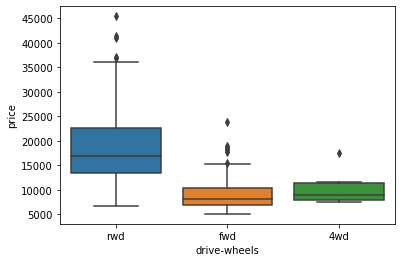

In [17]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

In [20]:
# sns.boxplot(x="body-style", y="price", data=df)

from the analysis it can be seen tha the variables with the most correlation to price are horsepower, curb-weight, engine-size, highway-mpg, engine-location
these variable can be considered when building a model for prediction of price

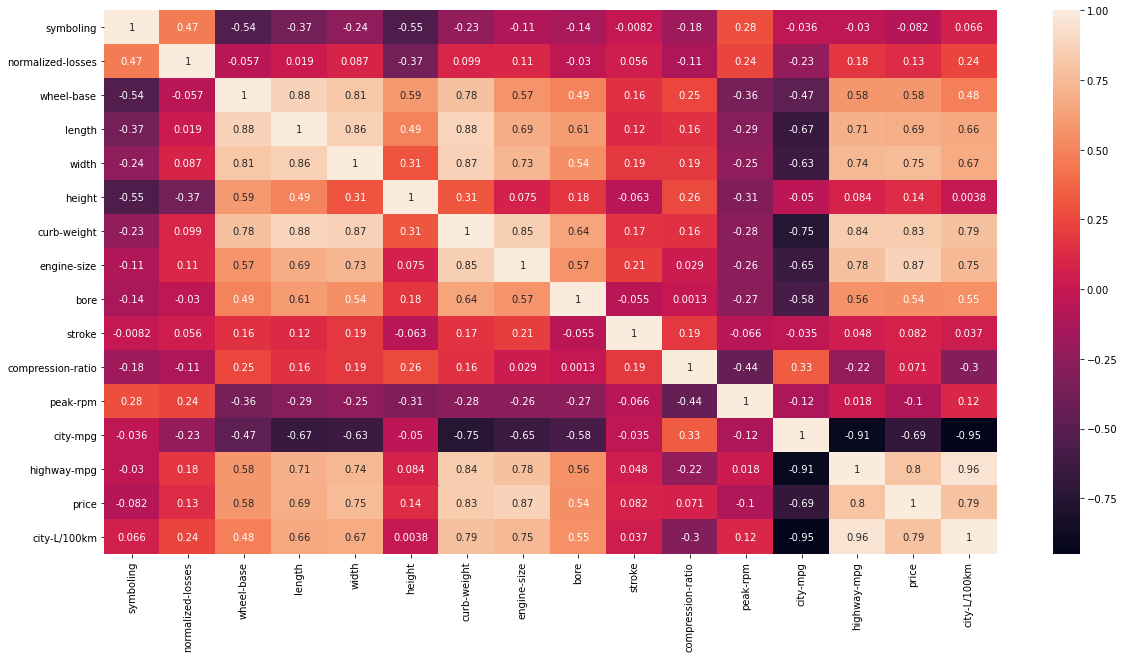

In [36]:
#visualizing the relationship between varaibles using an heatmap
plt.figure(figsize = (20,10))
data = df.corr()

sns.heatmap(data, annot= True)


### Vizualising relationship between linear variables

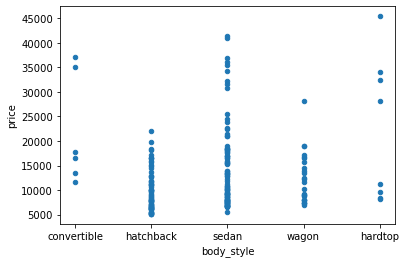

In [57]:
df_scatter = df[['price','body_style']]
df_scatter.plot(kind = 'scatter', x = 'body_style', y = 'price')
plt.show()

Body dtyle doesnt look to be a good predictor of the price since the lines is close to vertical. Therefore, it's not a reliable variable.

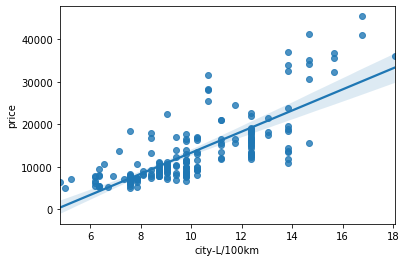

In [59]:
# df_scatter = df[['price','city-L/100km']].plot(kind = 'scatter', x = 'city-L/100km', y = 'price')
# plt.show()

sns.regplot(x="city-L/100km", y="price", data=df)

city-L/100km can be a good predictor of price

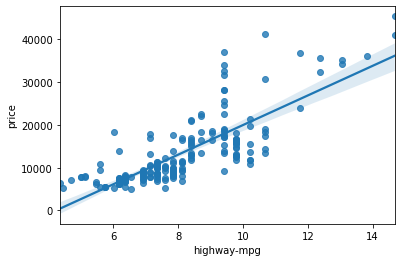

In [60]:
# df_scatter = df[['price','highway-mpg']].plot(kind = 'scatter', x = 'highway-mpg', y = 'price')
# plt.show()
sns.regplot(x="highway-mpg", y="price", data=df)

highway mpg is actually a good predictor of price and this can be seen from the above graph

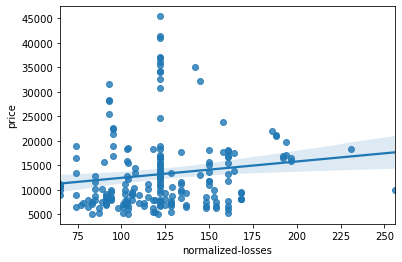

In [61]:
# df_scatter = df[['price','normalized-losses']].plot(kind = 'scatter', x = 'price', y = 'normalized-losses')
# plt.show()
sns.regplot(x="normalized-losses", y="price", data=df)

normalizesd losses shows weak correlation with price and this is evident as the regression line is almost horizontal'

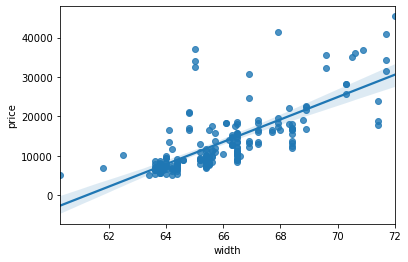

In [70]:
sns.regplot(x="width", y="price", data=df)

width can also be a good prdictor of price as seen from the graph

### Grouping and Descriptive statistics

In [21]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [22]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [29]:
# to find the average price of all vehicles based on body type
df_gptest2 = df[['body_style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body_style'],as_index= False).mean()
grouped_test_bodystyle.sort_values(by = ['price'], ascending = False)

,body_style,price
1,hardtop,22208.500000
0,convertible,21890.500000
3,sedan,14459.755319
4,wagon,12371.960000
2,hatchback,9957.441176


In [32]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [28]:
df_group_one = df[['drive-wheels','body_style','price']]
df_group_one.sort_values(by='price', ascending = False)

,drive-wheels,body_style,price
71,rwd,hardtop,45400.0
15,rwd,sedan,41315.0
70,rwd,sedan,40960.0
125,rwd,convertible,37028.0
16,rwd,sedan,36880.0
...,...,...,...
73,fwd,hatchback,5389.0
146,fwd,hatchback,5348.0
47,fwd,hatchback,5195.0
17,fwd,hatchback,5151.0


In [1]:
df.head()

NameError: name 'df' is not defined